In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("../data/raw/us_flights_delay.csv")

print("Shape:", df.shape)
df.head()

Shape: (171666, 21)


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [4]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171426.000000,171223.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
mean,2018.551361,6.493633,362.528467,66.434387,20.796615,2.250347,19.381147,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,992.894662,179.540694,50.315176,7.314252,61.675244,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,50.000000,6.000000,2.160000,0.000000,1.000000,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,100.000000,17.000000,6.400000,0.400000,3.910000,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.260000,1.860000,11.710000,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.000000,438783.00000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


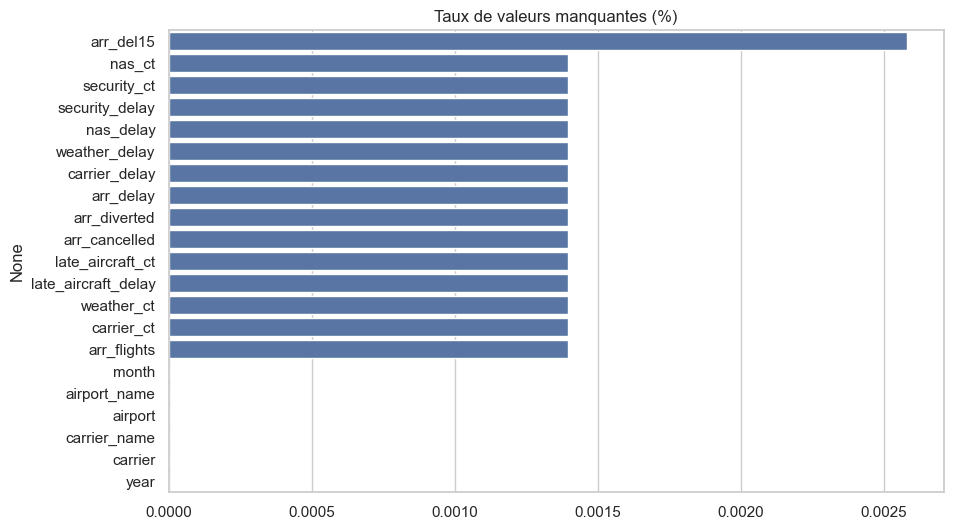

In [5]:
missing = df.isna().mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Taux de valeurs manquantes (%)")
plt.show()

In [6]:
# Suppression lignes avec arr_flights <= 0
df = df[df["arr_flights"] > 0]

# Suppression lignes sans informations essentielles
df = df.dropna(subset=["year", "month", "carrier", "airport"])

print("Shape après cleaning:", df.shape)
df.head()

Shape après cleaning: (171426, 21)


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [7]:
df["delay_rate"] = df["arr_del15"] / df["arr_flights"]
df["avg_delay_per_flight"] = df["arr_delay"] / df["arr_flights"]

df["cancel_rate"] = df["arr_cancelled"] / df["arr_flights"]
df["divert_rate"] = df["arr_diverted"] / df["arr_flights"]

for col in [
    "carrier_delay", "weather_delay", "nas_delay", 
    "security_delay", "late_aircraft_delay"
]:
    df[f"{col}_per_flight"] = df[col] / df["arr_flights"]

In [8]:
df[[
    "delay_rate", "avg_delay_per_flight", 
    "cancel_rate", "divert_rate",
    "carrier_delay_per_flight", "weather_delay_per_flight"
]].head()

,delay_rate,avg_delay_per_flight,cancel_rate,divert_rate,carrier_delay_per_flight,weather_delay_per_flight
0,0.146067,15.449438,0.022472,0.011236,0.797753,8.550562
1,0.161290,12.887097,0.000000,0.016129,3.516129,0.016129
2,0.161290,12.354839,0.016129,0.000000,0.903226,3.032258
3,0.181818,21.166667,0.015152,0.015152,7.136364,4.848485
4,0.239130,16.630435,0.021739,0.000000,6.826087,0.000000


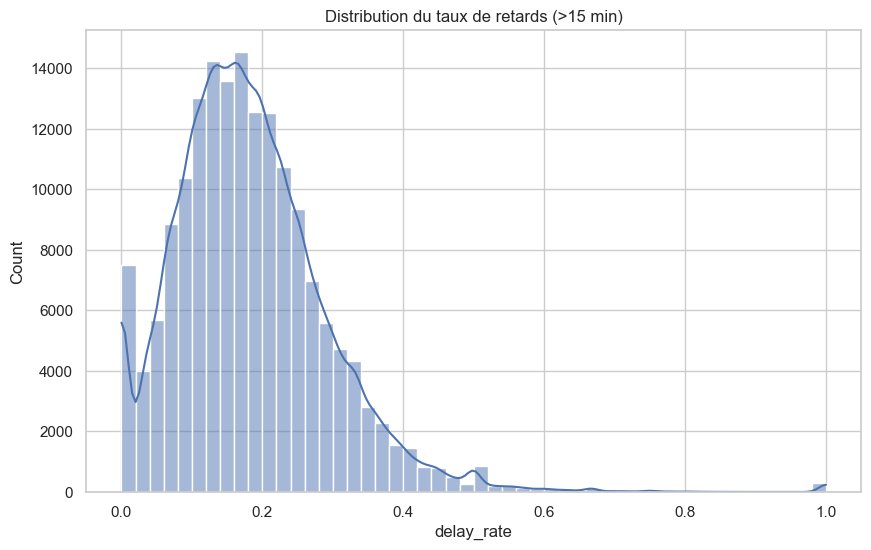

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df["delay_rate"], bins=50, kde=True)
plt.title("Distribution du taux de retards (>15 min)")
plt.show()

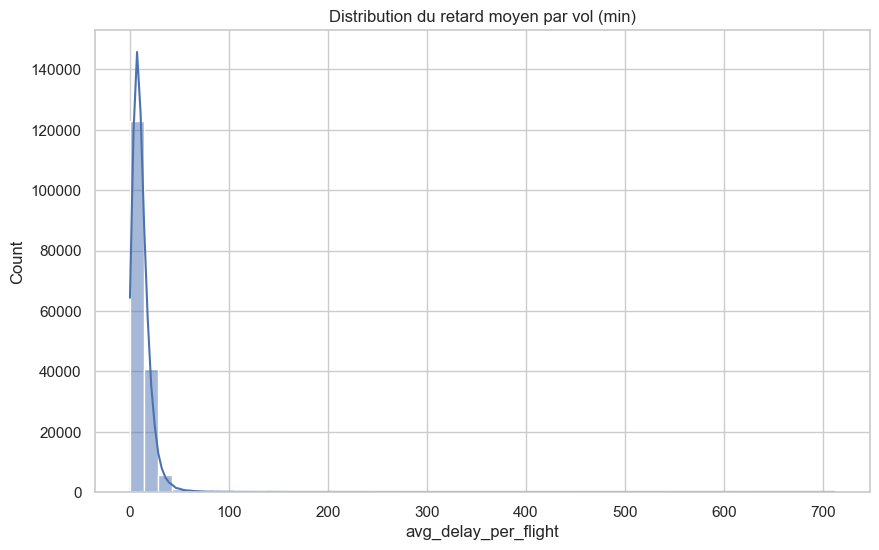

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df["avg_delay_per_flight"], bins=50, kde=True)
plt.title("Distribution du retard moyen par vol (min)")
plt.show()

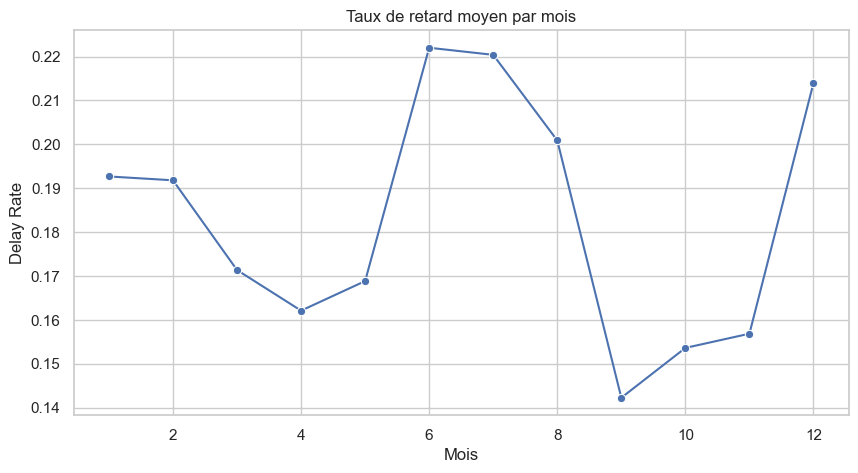

In [11]:
monthly = df.groupby("month")["delay_rate"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly.index, y=monthly.values, marker="o")
plt.title("Taux de retard moyen par mois")
plt.xlabel("Mois")
plt.ylabel("Delay Rate")
plt.show()

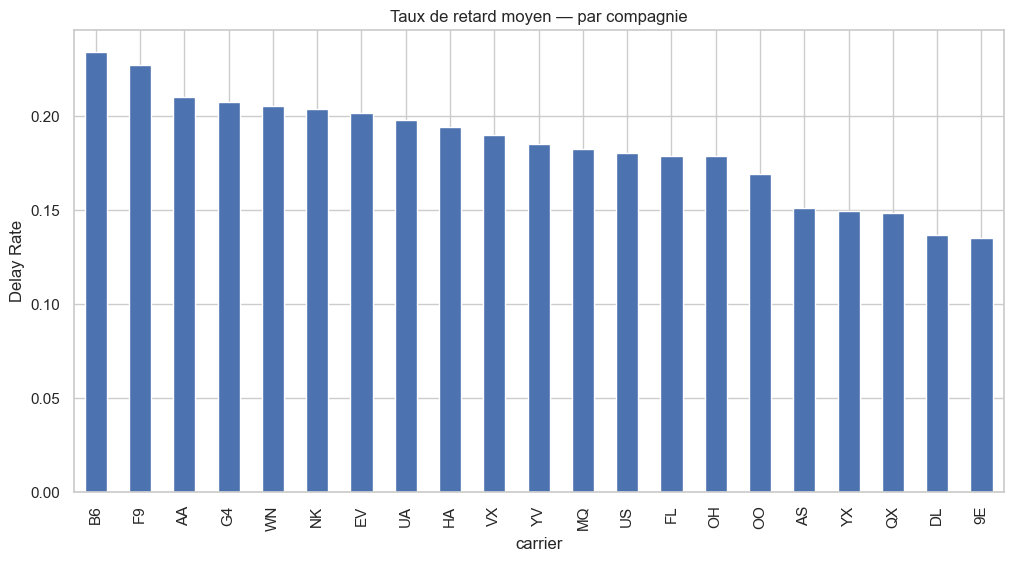

In [12]:
carrier_delay = df.groupby("carrier")["delay_rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
carrier_delay.plot(kind="bar")
plt.title("Taux de retard moyen — par compagnie")
plt.ylabel("Delay Rate")
plt.show()

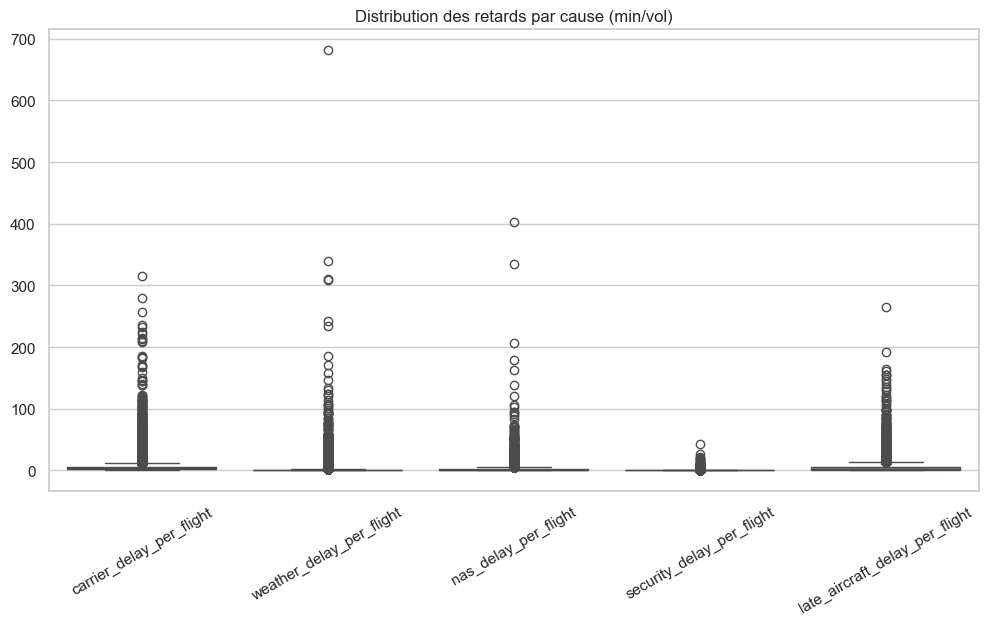

In [13]:
cause_cols = [
    "carrier_delay_per_flight",
    "weather_delay_per_flight",
    "nas_delay_per_flight",
    "security_delay_per_flight",
    "late_aircraft_delay_per_flight",
]

plt.figure(figsize=(12,6))
sns.boxplot(data=df[cause_cols])
plt.title("Distribution des retards par cause (min/vol)")
plt.xticks(rotation=30)
plt.show()

In [14]:
# 1) Sélectionner seulement les colonnes numériques
num_df = df.select_dtypes(include="number")

# 2) Retirer colonnes constantes (variance = 0)
num_df = num_df.loc[:, num_df.var() > 0]

# 3) Matrice de corrélation
corr = num_df.corr()

# 4) Masque triangulaire pour une meilleure lisibilité
mask = np.triu(np.ones_like(corr, dtype=bool))

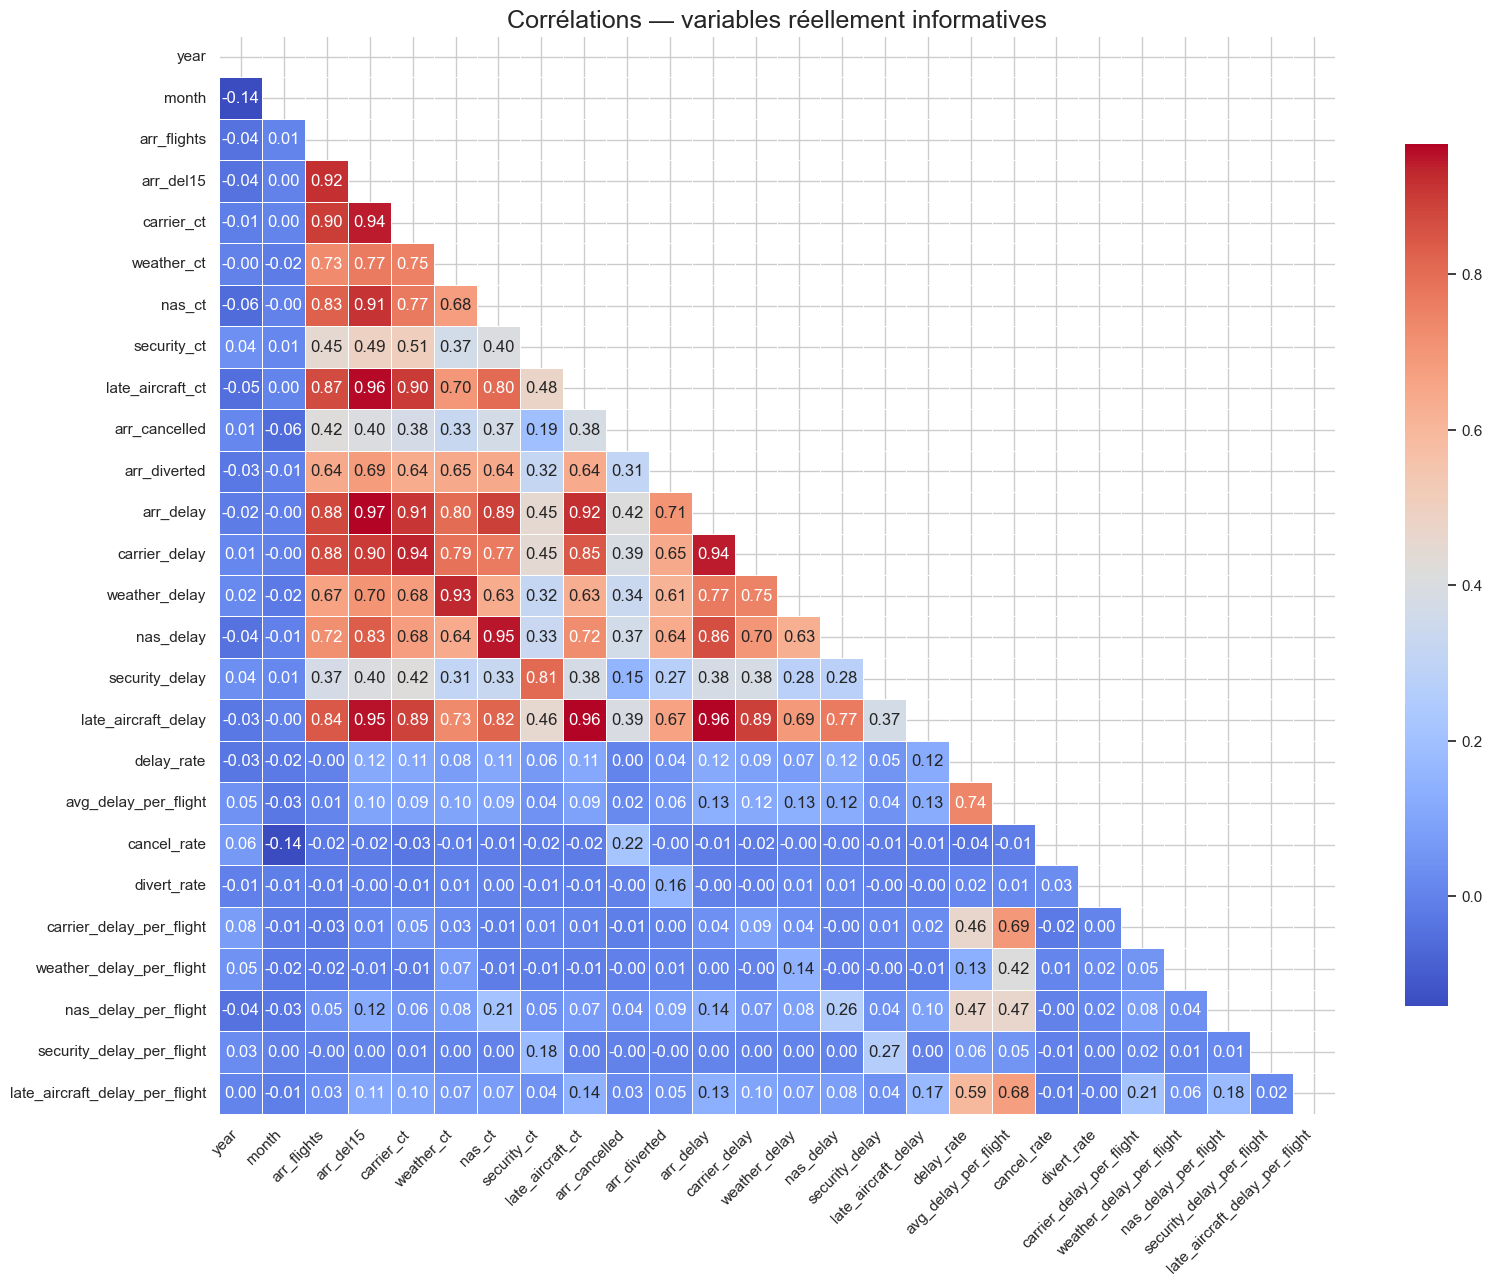

In [15]:
plt.figure(figsize=(18,14))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": .8},
)
plt.title("Corrélations — variables réellement informatives", fontsize=18)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

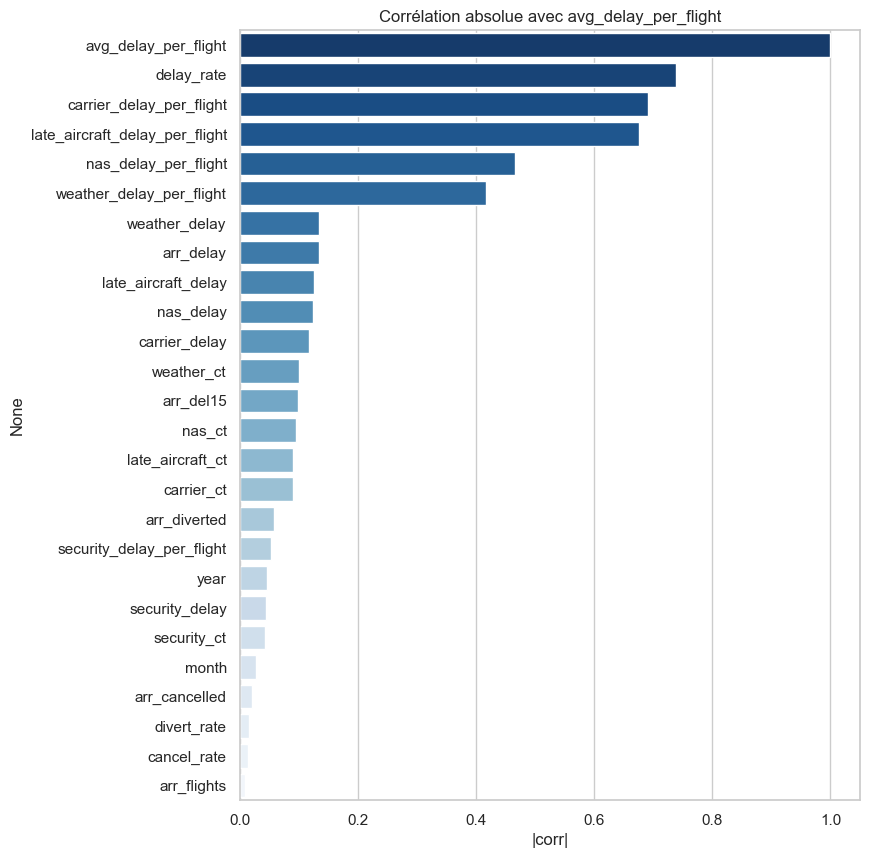

In [16]:
target = "avg_delay_per_flight"
corr_target = corr[target].abs().sort_values(ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="Blues_r")
plt.title("Corrélation absolue avec avg_delay_per_flight")
plt.xlabel("|corr|")
plt.show()

### Insights majeurs de l’EDA

- **Late Aircraft Delay** est la source la plus corrélée aux retards (jusqu’à 0.96).
- Les retards météo et NAS jouent un rôle important (corrélations entre 0.73 et 0.83).
- Le volume de trafic (`arr_flights`) amplifie mécaniquement le retard total.
- Les taux dérivés (`delay_rate`, `avg_delay_per_flight`) sont cohérents et informatifs.
- Les colonnes sécurité (security_delay) sont peu corrélées et apportent peu d’information.
- Une forte saisonnalité : été et fin d’année → plus de retards.
- Le dataset est propre après cleaning minimal, prêt pour le ML.

### Conséquences pour la modélisation
- Importance de normaliser les variables volumétriques.
- Essentiel d’inclure les **ratios** (per_flight) plutôt que les volumes bruts.
- Les features météo amélioreront les performances (corrélation directe & indirecte).